In [36]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import time
from decimal import Decimal

We will begin with the base code for recursion as described in Chapter 3 of Grokking Algorithms (Bhargava 2016).  https://github.com/egonSchiele/grokking_algorithms/blob/master/03_recursion/python/03_factorial.py

In [37]:
def fact(x):
    if x == 1:
        return 1
    else:
        return x * fact(x-1)

Next we set up an array of ten random numbers between 100 and 500 (just one array with 10 numbers).

In [50]:
# seeding is set to 1000 for testing purposes

random.seed(1000)
myArray = random.sample(range(100, 501), 10)
myArray.sort()


print(myArray)

[132, 150, 184, 280, 301, 319, 339, 442, 489, 498]


Now we calculate the factorial of each of the numbers using a simple FOR loop. Start/end times will be captured and stored in an array, or linked list, or dictionary.  

In [41]:
# Create function for simple for loop

def simple_fact(x):
    temp = 1
    for x in range(1, x + 1):
        temp = temp * x
    return temp

# Run simple_fact function and capture times

time_simple_loop = []

for i in range(len(myArray)):
    start = time.perf_counter()
    simple_fact(myArray[i])
    end = time.perf_counter()
    time_simple_loop.append((end - start) * 1000)

With that completed, we will now calculate the factorial of each of the numbers using recursion.  As before, start/end times will be stored.

In [42]:
#Run grokking recursive algorithm    

time_recursion = []

for i in range(len(myArray)):
    start = time.perf_counter()
    fact(myArray[i])
    end = time.perf_counter()
    time_recursion.append((end - start) * 1000)

Now we will organize the results of the study into a table showing the number, it's factorial, the time to calculate the factorial using recursion, the time to calculate factorial using FOR loop, and the difference between times.

In [47]:
# Convert factorial into scientific notation so we don't encounter run-time errors. 

factorial = []

for i in range(len(myArray)):
    factorial.append("{:.10e}".format(Decimal(fact(myArray[i]))))

# Calculate time differences between simple loop and recursive algorithm

time_diff = np.array(time_recursion) - np.array(time_simple_loop)

# Store results in dataframe and show table

df = pd.DataFrame(list(zip(myArray, factorial, time_recursion, time_simple_loop, time_diff, )),
              columns=['Number', 'Factorial', 'Recursion Time', 'For Loop Time', 'Difference Between Times'])

df

,Number,Factorial,Recursion Time,For Loop Time,Difference Between Times
0,132,1.1182486512e+224,0.0458,0.0132,0.0326
1,150,5.7133839564e+262,0.0452,0.0128,0.0324
2,184,2.2283853795e+338,0.0588,0.0164,0.0424
3,280,1.6772277799e+565,0.2566,0.0301,0.2265
4,301,9.2123311177e+616,0.1809,0.0319,0.1490
5,319,6.6128229601e+661,0.1210,0.0354,0.0856
6,339,1.5002542565e+712,0.1184,0.0384,0.0800
7,442,1.0974001127e+979,0.1654,0.0587,0.1067
8,489,2.7915720098e+1104,0.1658,0.0700,0.0958
9,498,4.8903279599e+1128,0.1433,0.0739,0.0694


Finally we will use python matplotlib to generate a graph that has number on the horizontal axis and with execution time in milliseconds on the vertical axis. The plot shows execution times of recursion and the loop.

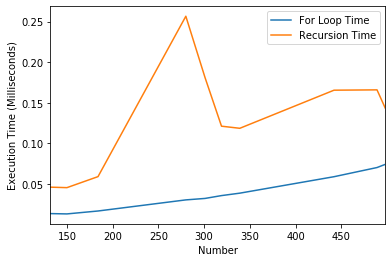

In [54]:
ax = plt.gca()

df.plot(x='Number',y='For Loop Time',ax=ax)
df.plot(x='Number',y='Recursion Time', ax=ax)
plt.xlabel('Number')
plt.ylabel('Execution Time (Milliseconds)')

plt.show()

Executive Summary

In data science projects, the time that an algorithm takes to run can be the most important part of a project. Because of this, it is important to know what types of algorithms execute the fastest. While we might view "simple" algorithms as less important in our day-to-day work, we should never neglect the results. In terms of our project above to calculate factorials, we can see above that "simple" algorithm outperformed the recursive algorith.

The plot above shows that the Recursive Time was longer than the simple For Loop time between in terms of milliseconds. What this means is that while recursive algorithms might be cleaner code and more easily read, the simple For Loop algorithm is what truely performs best. In terms of big O notation, both algorithms perform generally at O(n) time, but in the case of the recursive algorithm this is not always linear (as we a spike in the plot above mid-way between the numbers).

As data scientists and data engineers, we should remember that what is simple is simple for a reason: it works.
